## Metric-data 탐색

In [1]:
import os, sys
import tqdm
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

In [2]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

from src.visualization import plot_action
from src.preprocess_data import preprocess_data
from src.labels import preprocess_label

### 학습에 사용하기 위한 데이터 전처리

- preprocess_data

1. cleanse_metrica_event_data : 패스 성공 여부 / 골 / 자책골 유무를 레이블하는 작업
2. make_freeze_frame : 각 이벤트에 참여하는 선수들의 위치 / 속도 데이터

In [3]:
match_ids = [1, 2, 3]

all_events = []
for match_id in match_ids:
    events, traces = preprocess_data(match_id, field_dimen=(108,72))
    events = preprocess_label(events)
    
    events.to_csv(f'../data/EPV-data/match{match_id}.csv',index=False)
        
    events['game_id'] = match_id

    all_events.append(events)

all_events = pd.concat(all_events).reset_index(drop=True)
all_events['event_id'] = np.arange(len(all_events))
all_events.to_csv('../data/EPV-data/all-match.csv',index=False)

1745it [00:06, 277.10it/s]
1935it [00:07, 275.69it/s]
3620it [00:13, 275.05it/s]


In [17]:
all_events[all_events['type'] == 'PASS']['accurate'].value_counts()

accurate
1.0    2803
Name: count, dtype: int64

In [18]:
all_events[all_events['eventName'] == 'Pass']['accurate'].value_counts()

accurate
1.0    2803
0.0     430
Name: count, dtype: int64

In [23]:
all_events[all_events['eventName'] == 'Pass'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3314 entries, 1 to 7296
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team               3314 non-null   object 
 1   type               3314 non-null   object 
 2   subtype            3314 non-null   object 
 3   session            3314 non-null   int64  
 4   start_frame        3314 non-null   int64  
 5   start_time         3314 non-null   float64
 6   end_frame          3314 non-null   int64  
 7   end_time           3314 non-null   float64
 8   from               3314 non-null   object 
 9   to                 2884 non-null   object 
 10  start_x            3314 non-null   float64
 11  start_y            3314 non-null   float64
 12  end_x              3304 non-null   float64
 13  end_y              3304 non-null   float64
 14  phase              3314 non-null   int64  
 15  goal               3314 non-null   int64  
 16  ownGoal            3314 non-n

In [4]:
all_events[(all_events['eventName'] == 'Pass') & (all_events['accurate'].isna())]

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,...,goal,ownGoal,teamId,eventName,freeze_frame,accurate,value_label,Intended_Receiver,game_id,event_id


In [4]:
all_events = pd.read_csv('../data/EPV-data/all-match.csv')
all_events['freeze_frame'] = all_events['freeze_frame'].apply(ast.literal_eval)
all_events['Intended_Receiver'] = all_events['Intended_Receiver'].apply(ast.literal_eval)

pass_events = all_events[all_events['eventName'] == 'Pass']
pass_events.head()

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,...,goal,ownGoal,teamId,eventName,freeze_frame,accurate,value_label,Intended_Receiver,game_id,event_id
1,Away,PASS,PASS,1,1,0.04,3,0.12,B19,B21,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B21', 'end_x': 59.66244, 'end...",1,1
2,Away,PASS,PASS,1,3,0.12,17,0.68,B21,B15,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B15', 'end_x': 63.06444, 'end...",1,2
3,Away,PASS,PASS,1,45,1.80,61,2.44,B15,B19,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B19', 'end_x': 48.33756, 'end...",1,3
4,Away,PASS,PASS,1,77,3.08,96,3.84,B19,B21,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B21', 'end_x': 52.67376, 'end...",1,4
5,Away,PASS,PASS,1,191,7.64,217,8.68,B21,B22,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B22', 'end_x': 33.16356, 'end...",1,5


In [19]:
pass_events[pass_events['accurate'] == 1][['type','subtype']].value_counts()

type  subtype               
PASS  PASS                      2747
      GOAL KICK                   33
      CROSS                       12
      DEEP BALL                    8
      CLEARANCE                    1
      OFFSIDE                      1
      THROUGH BALL-DEEP BALL       1
Name: count, dtype: int64

In [20]:
pass_events[pass_events['accurate'] == 0][['type','subtype']].value_counts()

type       subtype               
BALL LOST  INTERCEPTION              347
           CROSS-INTERCEPTION         22
BALL OUT   CLEARANCE                  18
BALL LOST  CLEARANCE                  16
           GOAL KICK-INTERCEPTION      9
           CROSS                       5
           GOAL KICK                   4
BALL OUT   CROSS                       4
BALL LOST  DEEP BALL                   2
           CLEARANCE-INTERCEPTION      1
BALL OUT   DEEP BALL                   1
           GOAL KICK                   1
Name: count, dtype: int64

### 패스 이벤트 시각화

<Axes: title={'center': 'Fail BALL LOST(BALL LOST)\nB18 -> nan\nIntended-receiver(dist) = B24'}>

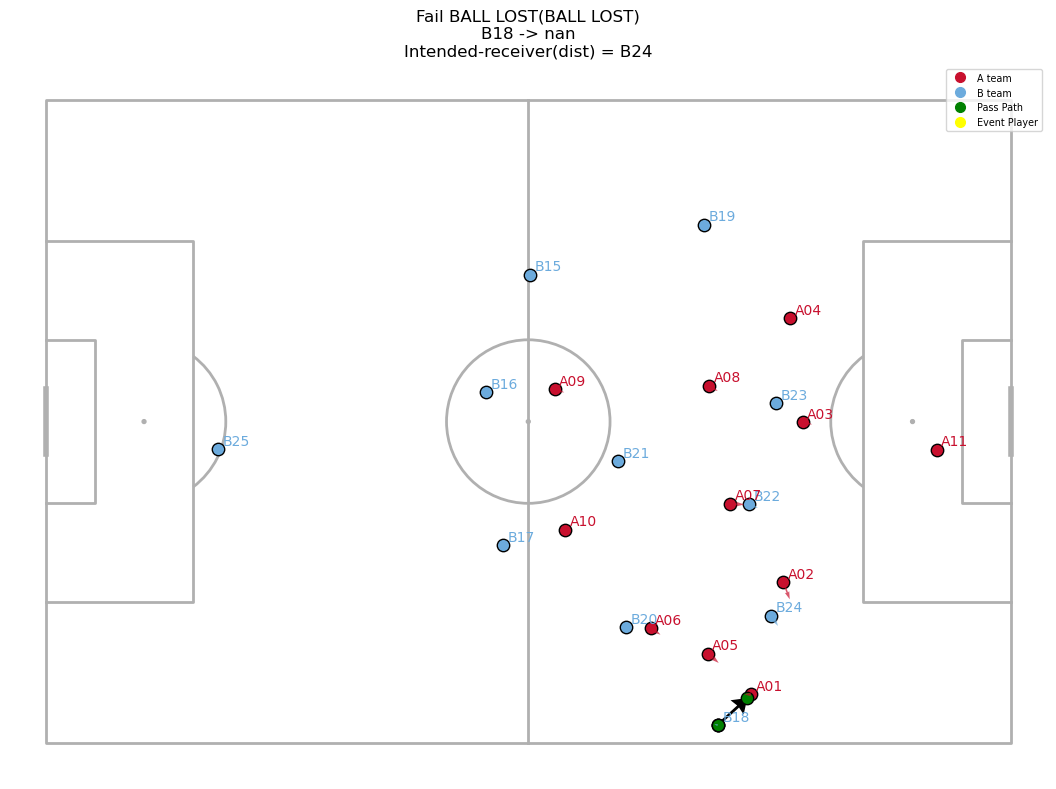

In [21]:
plot_action(all_events.loc[all_events['event_id'] == 2335].squeeze(), left_to_right=True,field_dimen=(108,72))

In [8]:
col = ['team', 'type', 'subtype', 'session', 'start_frame', 'start_time',
       'end_frame', 'end_time','phase','teamId', 'eventName',
      'accurate', 'freeze_frame', 'game_id','event_id']

all_events.groupby(['game_id', 'session']).head(2)[col]

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,phase,teamId,eventName,accurate,freeze_frame,game_id,event_id
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,1,2,SET PIECE,NaN,{},1,0
1,Away,PASS,PASS,1,1,0.04,3,0.12,1,2,Pass,1.0,"{'B25': {'teammate': True, 'actor': False, 'ba...",1,1
892,Home,SET PIECE,KICK OFF,2,72135,2885.40,72135,2885.40,3,1,SET PIECE,NaN,{},1,892
893,Home,PASS,PASS,2,72135,2885.40,72160,2886.40,3,1,Pass,1.0,"{'A02': {'teammate': True, 'actor': False, 'ba...",1,893
1745,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,1,2,SET PIECE,NaN,{},2,1745
1746,Away,PASS,PASS,1,51,2.04,87,3.48,1,2,Pass,1.0,"{'A01': {'teammate': False, 'actor': False, 'b...",2,1746
2774,Home,SET PIECE,KICK OFF-RETAKEN,2,67992,2719.68,67992,2719.68,0,1,SET PIECE,NaN,{},2,2774
2775,Home,PASS,PASS,2,67992,2719.68,68022,2720.88,0,1,Pass,1.0,"{'A11': {'teammate': True, 'actor': False, 'ba...",2,2775
3680,Away,SET PIECE,KICK OFF,1,361,14.44,361,14.44,1,2,SET PIECE,NaN,{},3,3680
3681,Away,PASS,PASS,1,361,14.44,377,15.08,1,2,Pass,1.0,"{'A11': {'teammate': True, 'actor': False, 'ba...",3,3681


In [19]:
pd.DataFrame.from_dict(all_events.loc[7296]['freeze_frame'],orient='columns')

,A01,A04,A06,A07,A11,A12,A13,A14,A15,A16,...,B23,B25,B29,B30,B31,B32,B33,B34,B35,ball
teammate,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
actor,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
ball,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
start_x,62.70156,61.84296,50.57856,49.86252,95.04756,63.66708,51.30864,40.5378,35.18964,46.6722,...,56.04228,50.4144,28.134,41.32296,63.48888,31.6872,30.93876,14.08752,56.81664,30.93876
start_y,40.15872,51.22584,22.14432,38.49264,34.71624,27.51768,13.74552,39.51144,17.96688,53.5716,...,47.07648,21.00024,36.69624,31.50792,33.31512,57.88368,10.116,32.796,25.91064,10.116
start_vx,0.341396,0.209455,-0.394641,-0.458685,-0.0,0.424976,-0.082221,-0.037133,-0.538414,0.193745,...,0.293765,0.142112,-0.772842,0.089497,0.123583,-0.409846,0.011027,-0.411885,-0.711189,None
start_vy,-0.936789,-0.708671,-1.693175,-2.029024,-0.0,-0.655787,-0.997527,-0.681449,-2.358159,-0.478959,...,-1.240716,-1.434243,-1.327368,-1.179222,-1.171569,-0.811183,-0.578299,-1.066171,1.008906,None
end_x,61.56756,60.69384,46.1646,43.60284,95.04756,61.07184,48.19716,36.33984,29.67084,43.12764,...,55.62756,50.63688,20.96928,39.26664,63.06444,26.136,27.03456,12.12192,55.16208,12.38652
end_y,36.99504,48.40992,21.44592,33.0768,34.71624,26.41392,12.19896,37.998,15.82128,51.4836,...,42.51528,16.29792,34.30224,28.44648,28.42488,57.52872,9.0756,35.14392,28.90728,34.79112
end_vx,-0.663004,-0.334699,-0.601729,-1.011776,-0.0,-0.744269,-0.875303,-1.505958,-0.5616,-1.369938,...,-0.392098,-0.203589,-1.207032,-0.521874,-0.35061,-1.18951,-0.623429,-0.231382,0.018604,None


### 각 Metrica경기에서 홈팀(A)가 왼쪽에서 시작하는지 오른쪽에서 시작하는지 파악함

1. metrica1 : home(A) & away(B)
- 전반전 : home(A) - away(B)
- 후반적 : away(B) - home(A) => flip필요성

2. metrica2 : home(A) & away(B)
- 전반전 :  away(B) - hOME(A) => flip필요성
- 후반적 :  home(A) - away(B)

3. metrica3 : home(B) & away(A)
- 전반전 :  home(B) - away(A)
- 후반적 :  away(A) - home(B) => flip필요성

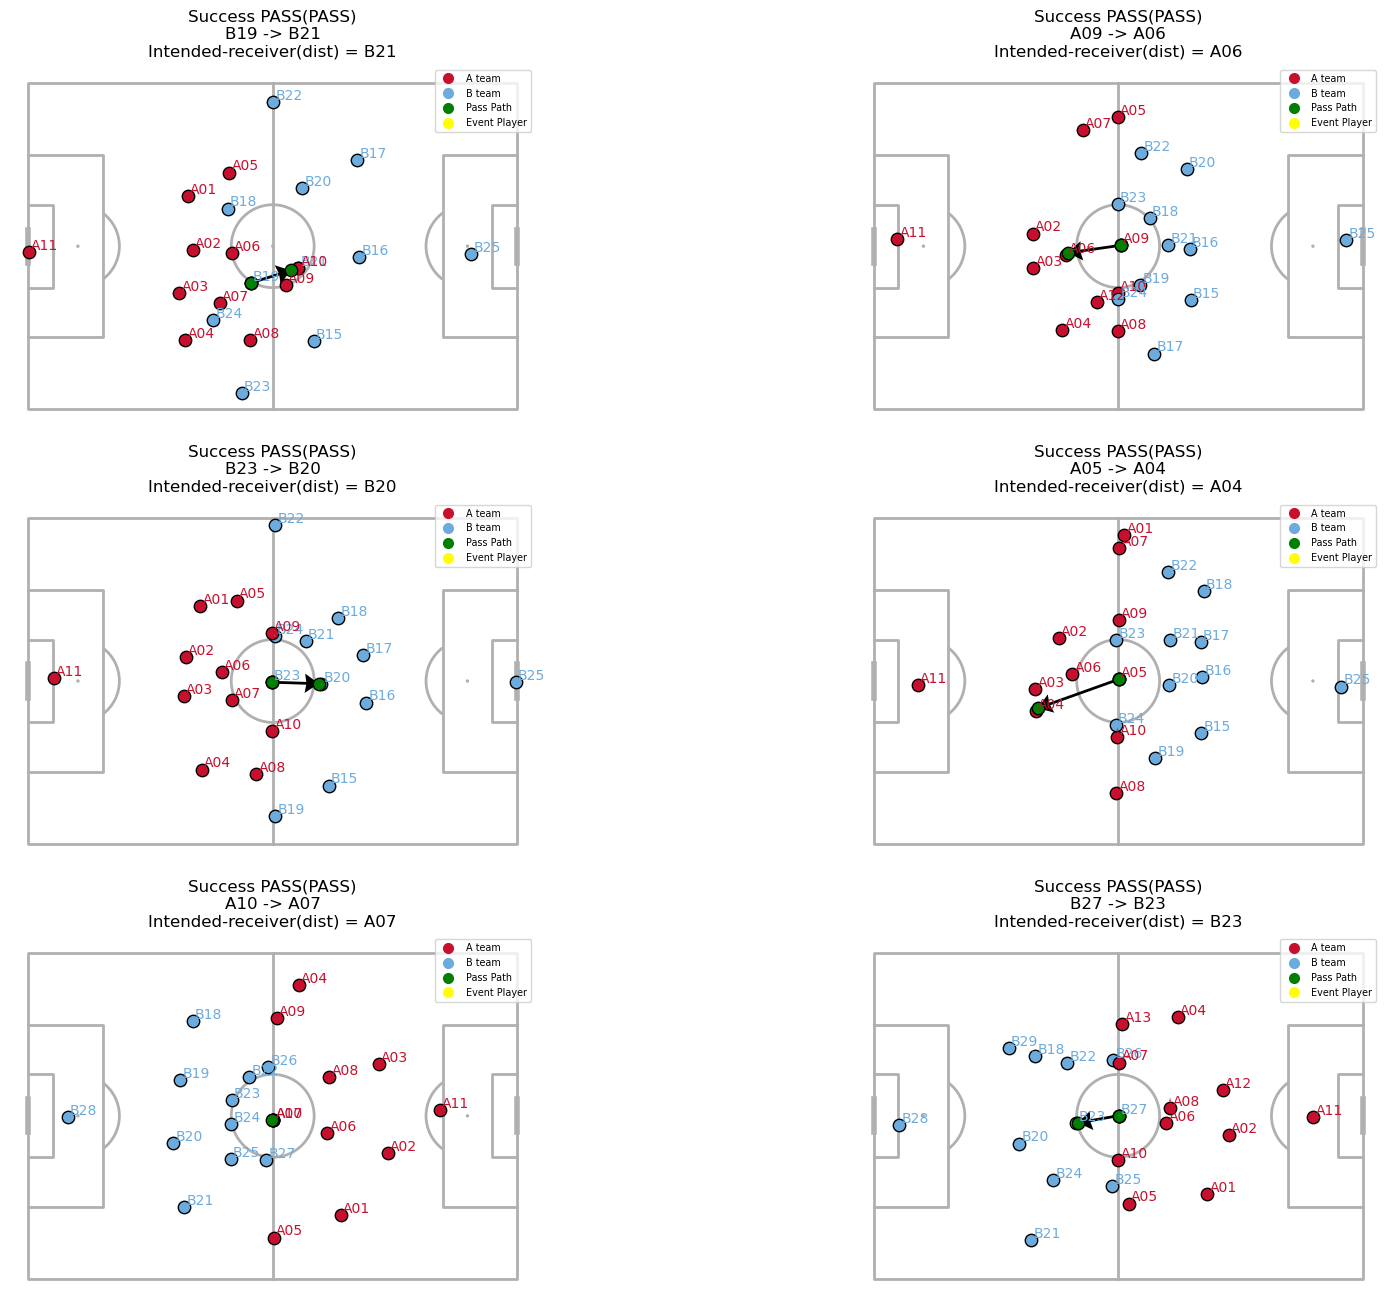

In [10]:
action_id = [1,893, 1746, 2775, 3681, 5445]

fig, ax = plt.subplots(3,2,figsize=(20,16))

ax_id = [ax[0,0], ax[0,1], ax[1,0], ax[1,1], ax[2,0], ax[2,1]] 


for i in range(len(action_id)):
    record = all_events.loc[action_id[i]]
    plot_action(record, ax=ax_id[i],left_to_right=False,field_dimen=(108,72))

plt.show()

## Metrica-data 각 type별 특징 파악하기

- metrica는 각 type별로 subtype이 존재하는데, 어떤 유형의 이벤트가 존재하는지 시각화를 통해서 파악해보자

In [6]:
all_events['type'].value_counts()

type
PASS              2884
CARRY             1395
CHALLENGE          879
RECOVERY           820
BALL LOST          778
SET PIECE          247
BALL OUT           164
SHOT                68
FAULT RECEIVED      54
CARD                11
Name: count, dtype: int64

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_by_type(all_events, given_type, type_column='type', subtype_column='subtype'):
    # 주어진 TYPE에 해당하는 데이터를 필터링합니다.
    filtered_events = all_events[all_events[type_column] == given_type]
    
    # 해당 TYPE에서 유니크한 SUBTYPE 값을 가져옵니다.
    subtypes = filtered_events[subtype_column].unique()
    print("subtypes : ", subtypes)
    # SUBTYPE의 개수에 맞춰서 subplot 배열의 크기를 결정합니다.
    n_subtypes = len(subtypes)
    n_cols = 3
    n_rows = np.ceil(n_subtypes / n_cols).astype(int)
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), squeeze=False)
    
    # 각 SUBTYPE에 대해 반복하며 시각화합니다.
    for i, subtype in enumerate(subtypes):
        row = i // n_cols
        col = i % n_cols
        
        # 현재 SUBTYPE에 대한 데이터를 필터링합니다.
        subtype_events = filtered_events[filtered_events[subtype_column] == subtype]
        print(subtype, len(subtype_events),"개 : ",subtype_events.iloc[-1]['event_id'],".mp4")
        # SUBTYPE별로 첫 번째 이벤트를 가져와서 plot_action 함수에 전달합니다.
        if not subtype_events.empty:
            record = subtype_events.iloc[-1]
            
            plot_action(record, ax=axs[row, col], field_dimen=(108,72))
            
        axs[row, col].set_title(f"{given_type} - {subtype}")
    
    # 남은 subplot을 숨깁니다.
    for j in range(i+1, n_rows*n_cols):
        fig.delaxes(axs.flatten()[j])
        
    plt.tight_layout(pad=3.0)  # pad 값을 줄이면 subplot 간의 간격이 줄어듭니다.
    plt.show()

def plot_by_subtype(all_events, given_subtype, type_column='type', subtype_column='subtype'):
    # 주어진 TYPE에 해당하는 데이터를 필터링합니다.
    filtered_events = all_events[all_events[subtype_column] == given_subtype]
    
    # 해당 TYPE에서 유니크한 SUBTYPE 값을 가져옵니다.
    types = filtered_events[type_column].unique()
    
    # SUBTYPE의 개수에 맞춰서 subplot 배열의 크기를 결정합니다.
    n_subtypes = len(types)
    n_cols = 3
    n_rows = np.ceil(n_subtypes / n_cols).astype(int)
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), squeeze=False)
    
    # 각 SUBTYPE에 대해 반복하며 시각화합니다.
    for i, type in enumerate(types):
        row = i // n_cols
        col = i % n_cols
        
        # 현재 SUBTYPE에 대한 데이터를 필터링합니다.
        type_events = filtered_events[filtered_events[type_column] == type]
        print(type, type_events.count(type),"개 -> ",type_events.iloc[-1]['event_id'])
        # SUBTYPE별로 첫 번째 이벤트를 가져와서 plot_action 함수에 전달합니다.
        if not type_events.empty:
            record = type_events.iloc[-1]
            
            plot_action(record, ax=axs[row, col], field_dimen=(108,72))
            
        axs[row, col].set_title(f"{type} - {given_subtype}")
    
    # 남은 subplot을 숨깁니다.
    for j in range(i+1, n_rows*n_cols):
        fig.delaxes(axs.flatten()[j])
        
    plt.tight_layout(pad=3.0)  # pad 값을 줄이면 subplot 간의 간격이 줄어듭니다.
    plt.show()

#### 1. PASS

- PASS : 볼 소유가 같은 팀의 두 선수 사이에서 변경됩니다. 
- 즉 passer과 receiver가 모두 같은 팀이다
- receiver가 같은 팀이면 PASS인 것이지 실제로 offside같은 장면도 포함된 이벤트이다.

1. PASS
2. HEAD
3. CROSS
4. GOAL KICK
5. DEEP BALL
6. THROUGH BALL-DEEP BALL
7. HEAD-CLEARANCE
8. CLEARANCE
9. HEAD-INTERCEPTION-CLEARANCE
10. OFFSIDE
11. DEEP BALL-OFFSIDE

subtypes :  ['PASS' 'HEAD' 'CROSS' 'GOAL KICK' 'DEEP BALL' 'THROUGH BALL-DEEP BALL'
 'HEAD-CLEARANCE' 'CLEARANCE' 'HEAD-INTERCEPTION-CLEARANCE' 'OFFSIDE']
PASS 2747 개 :  7296 .mp4
HEAD 78 개 :  7269 .mp4
CROSS 12 개 :  7262 .mp4
GOAL KICK 33 개 :  6638 .mp4
DEEP BALL 8 개 :  6929 .mp4
THROUGH BALL-DEEP BALL 1 개 :  656 .mp4
HEAD-CLEARANCE 2 개 :  1164 .mp4
CLEARANCE 1 개 :  1238 .mp4
HEAD-INTERCEPTION-CLEARANCE 1 개 :  2977 .mp4
OFFSIDE 1 개 :  5210 .mp4


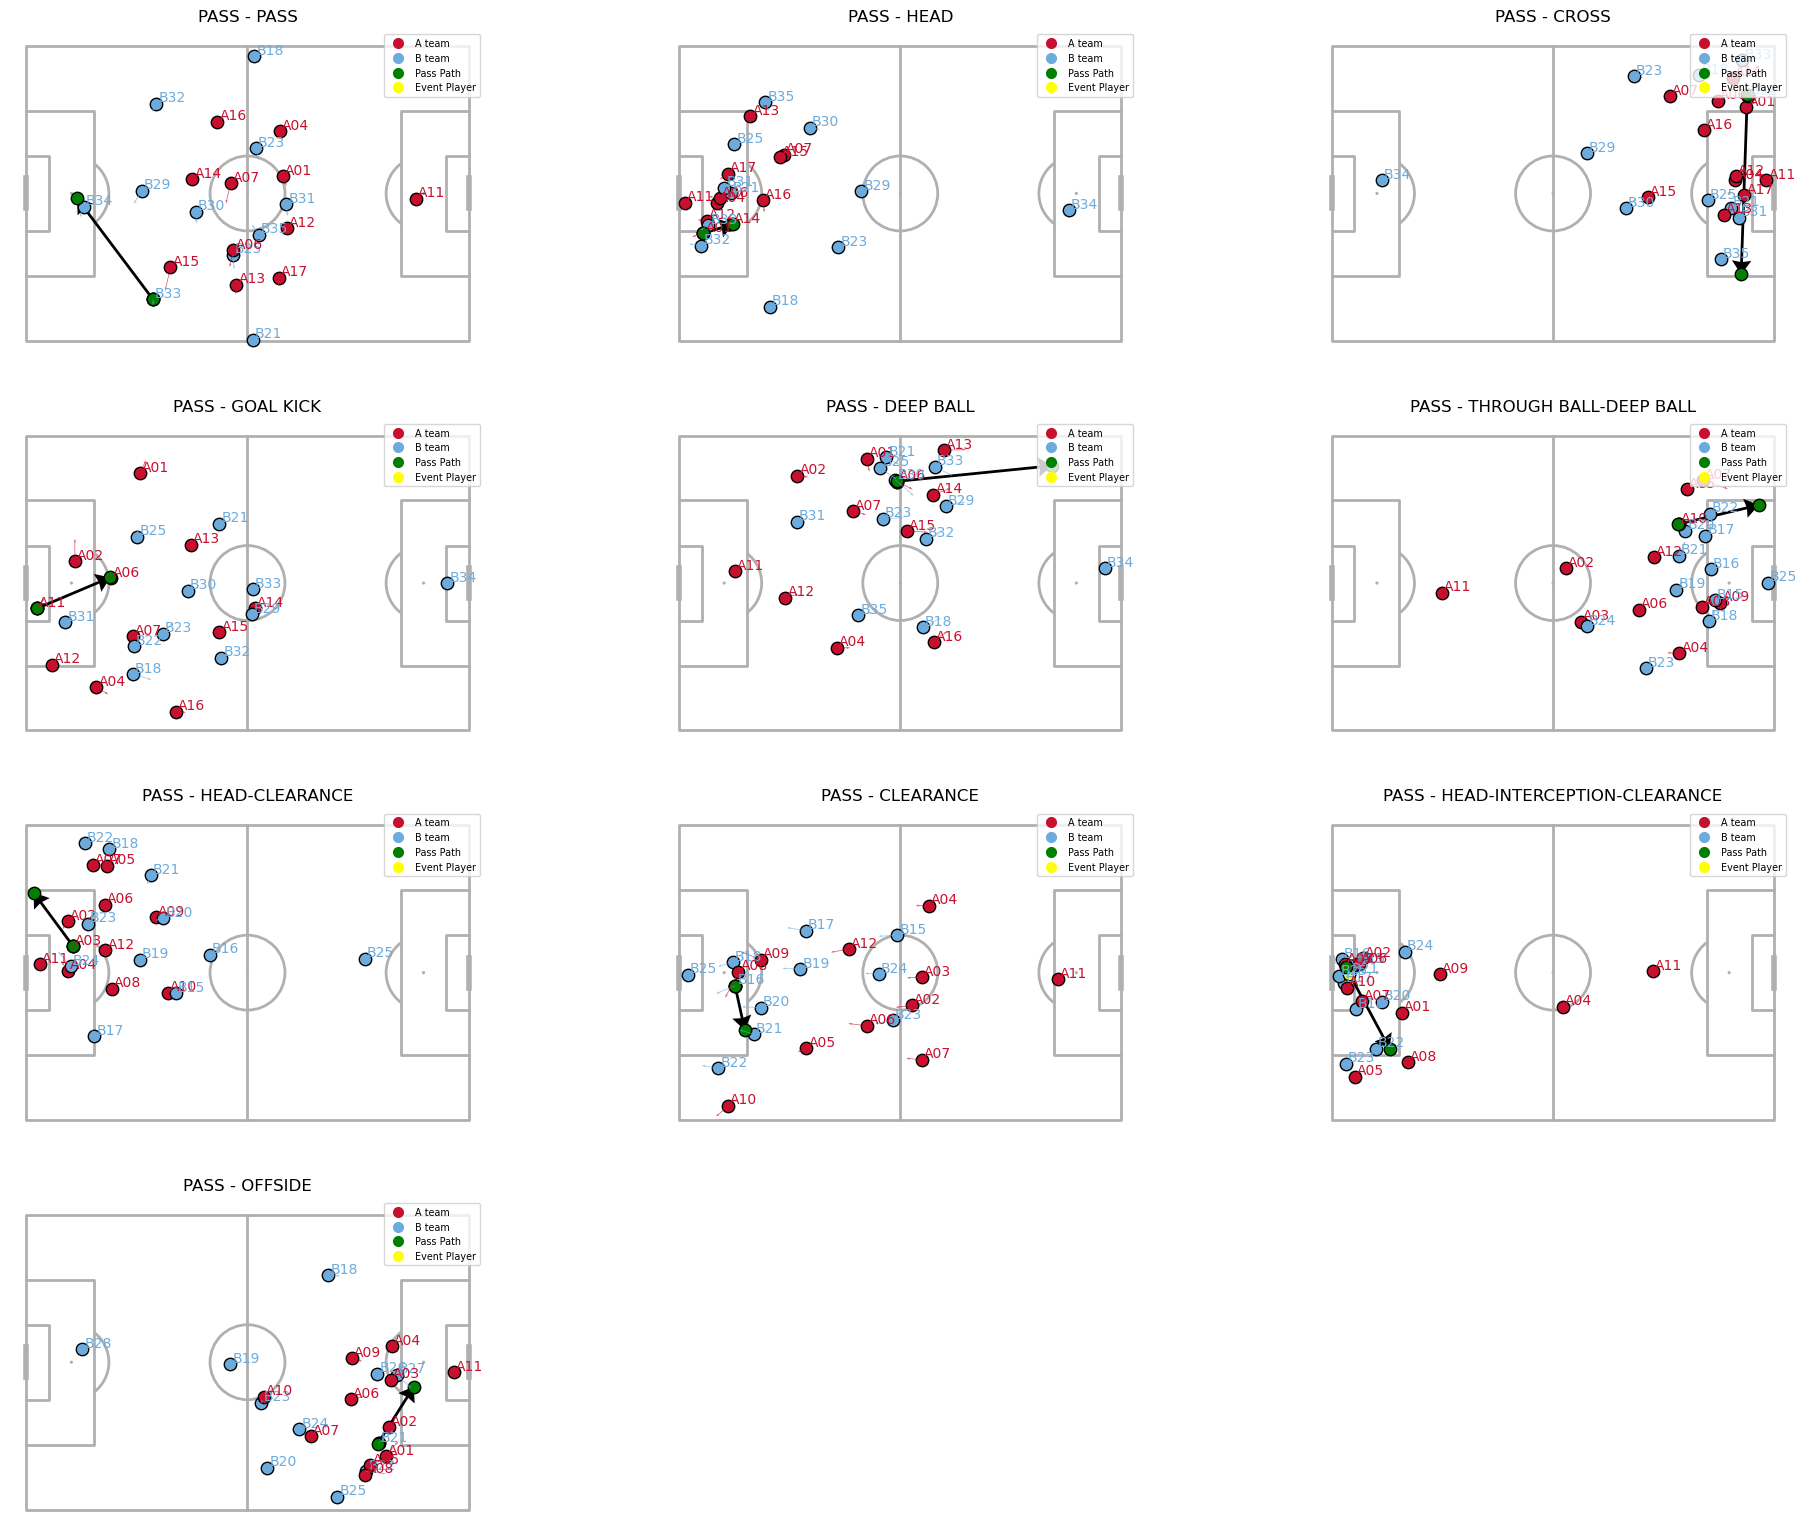

In [6]:
plot_by_type(all_events,given_type='PASS')

#### 2. CARRY

볼을 소유한채로 드리블하는 장면으로 subtype은 존재하지 않음    

subtypes :  ['CARRY']
CARRY 1395 개 :  7298 .mp4


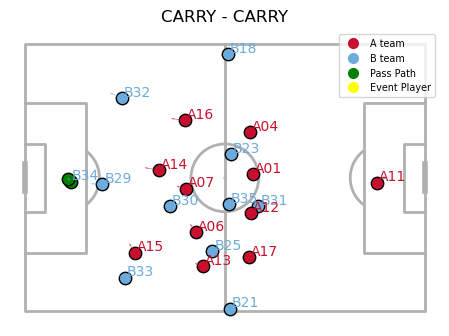

In [7]:
plot_by_type(all_events, given_type='CARRY')

#### 3. CHALLENGE

- 두 명 이상의 선수가 볼 소유권을 위해 도전하거나 서로를 방해할 의도로 참여합니다.

1. GROUND : 어깨보다 낮은 곳에서 볼을 받기 위해 경쟁
2. TACKLE : 볼을 소유한 선수에게 태클
3. AERIAL : 어깨 높이 이상의 볼을 받기 위해 경쟁
4. DRIIBLE : 드리블하므로써 상대 선수를 제치기 위한 경쟁

subtypes :  ['AERIAL-LOST' 'AERIAL-WON' 'GROUND-LOST' 'GROUND-WON' 'TACKLE-WON'
 'TACKLE-LOST' 'AERIAL-FAULT-LOST' 'AERIAL-FAULT-WON' 'GROUND-FAULT-WON'
 'GROUND-FAULT-LOST' 'DRIBBLE-WON' 'TACKLE-FAULT-LOST' 'TACKLE-FAULT-WON'
 'GROUND' 'TACKLE-ADVANTAGE-LOST' 'TACKLE-ADVANTAGE-WON'
 'GROUND-ADVANTAGE-LOST' 'GROUND-ADVANTAGE-WON' 'FAULT-WON' 'CHALLENGE'
 'AERIAL']
AERIAL-LOST 52 개 :  3677 .mp4
AERIAL-WON 62 개 :  3652 .mp4
GROUND-LOST 69 개 :  3654 .mp4
GROUND-WON 69 개 :  3617 .mp4
TACKLE-WON 74 개 :  3520 .mp4
TACKLE-LOST 80 개 :  3566 .mp4
AERIAL-FAULT-LOST 8 개 :  3668 .mp4
AERIAL-FAULT-WON 7 개 :  3669 .mp4
GROUND-FAULT-WON 21 개 :  3664 .mp4
GROUND-FAULT-LOST 25 개 :  3663 .mp4
DRIBBLE-WON 2 개 :  3472 .mp4
TACKLE-FAULT-LOST 23 개 :  3054 .mp4
TACKLE-FAULT-WON 25 개 :  3584 .mp4
GROUND 15 개 :  6461 .mp4
TACKLE-ADVANTAGE-LOST 3 개 :  2997 .mp4
TACKLE-ADVANTAGE-WON 5 개 :  3644 .mp4
GROUND-ADVANTAGE-LOST 5 개 :  2800 .mp4
GROUND-ADVANTAGE-WON 3 개 :  2873 .mp4
FAULT-WON 1 개 :  2473 .mp4
CHALLENGE 

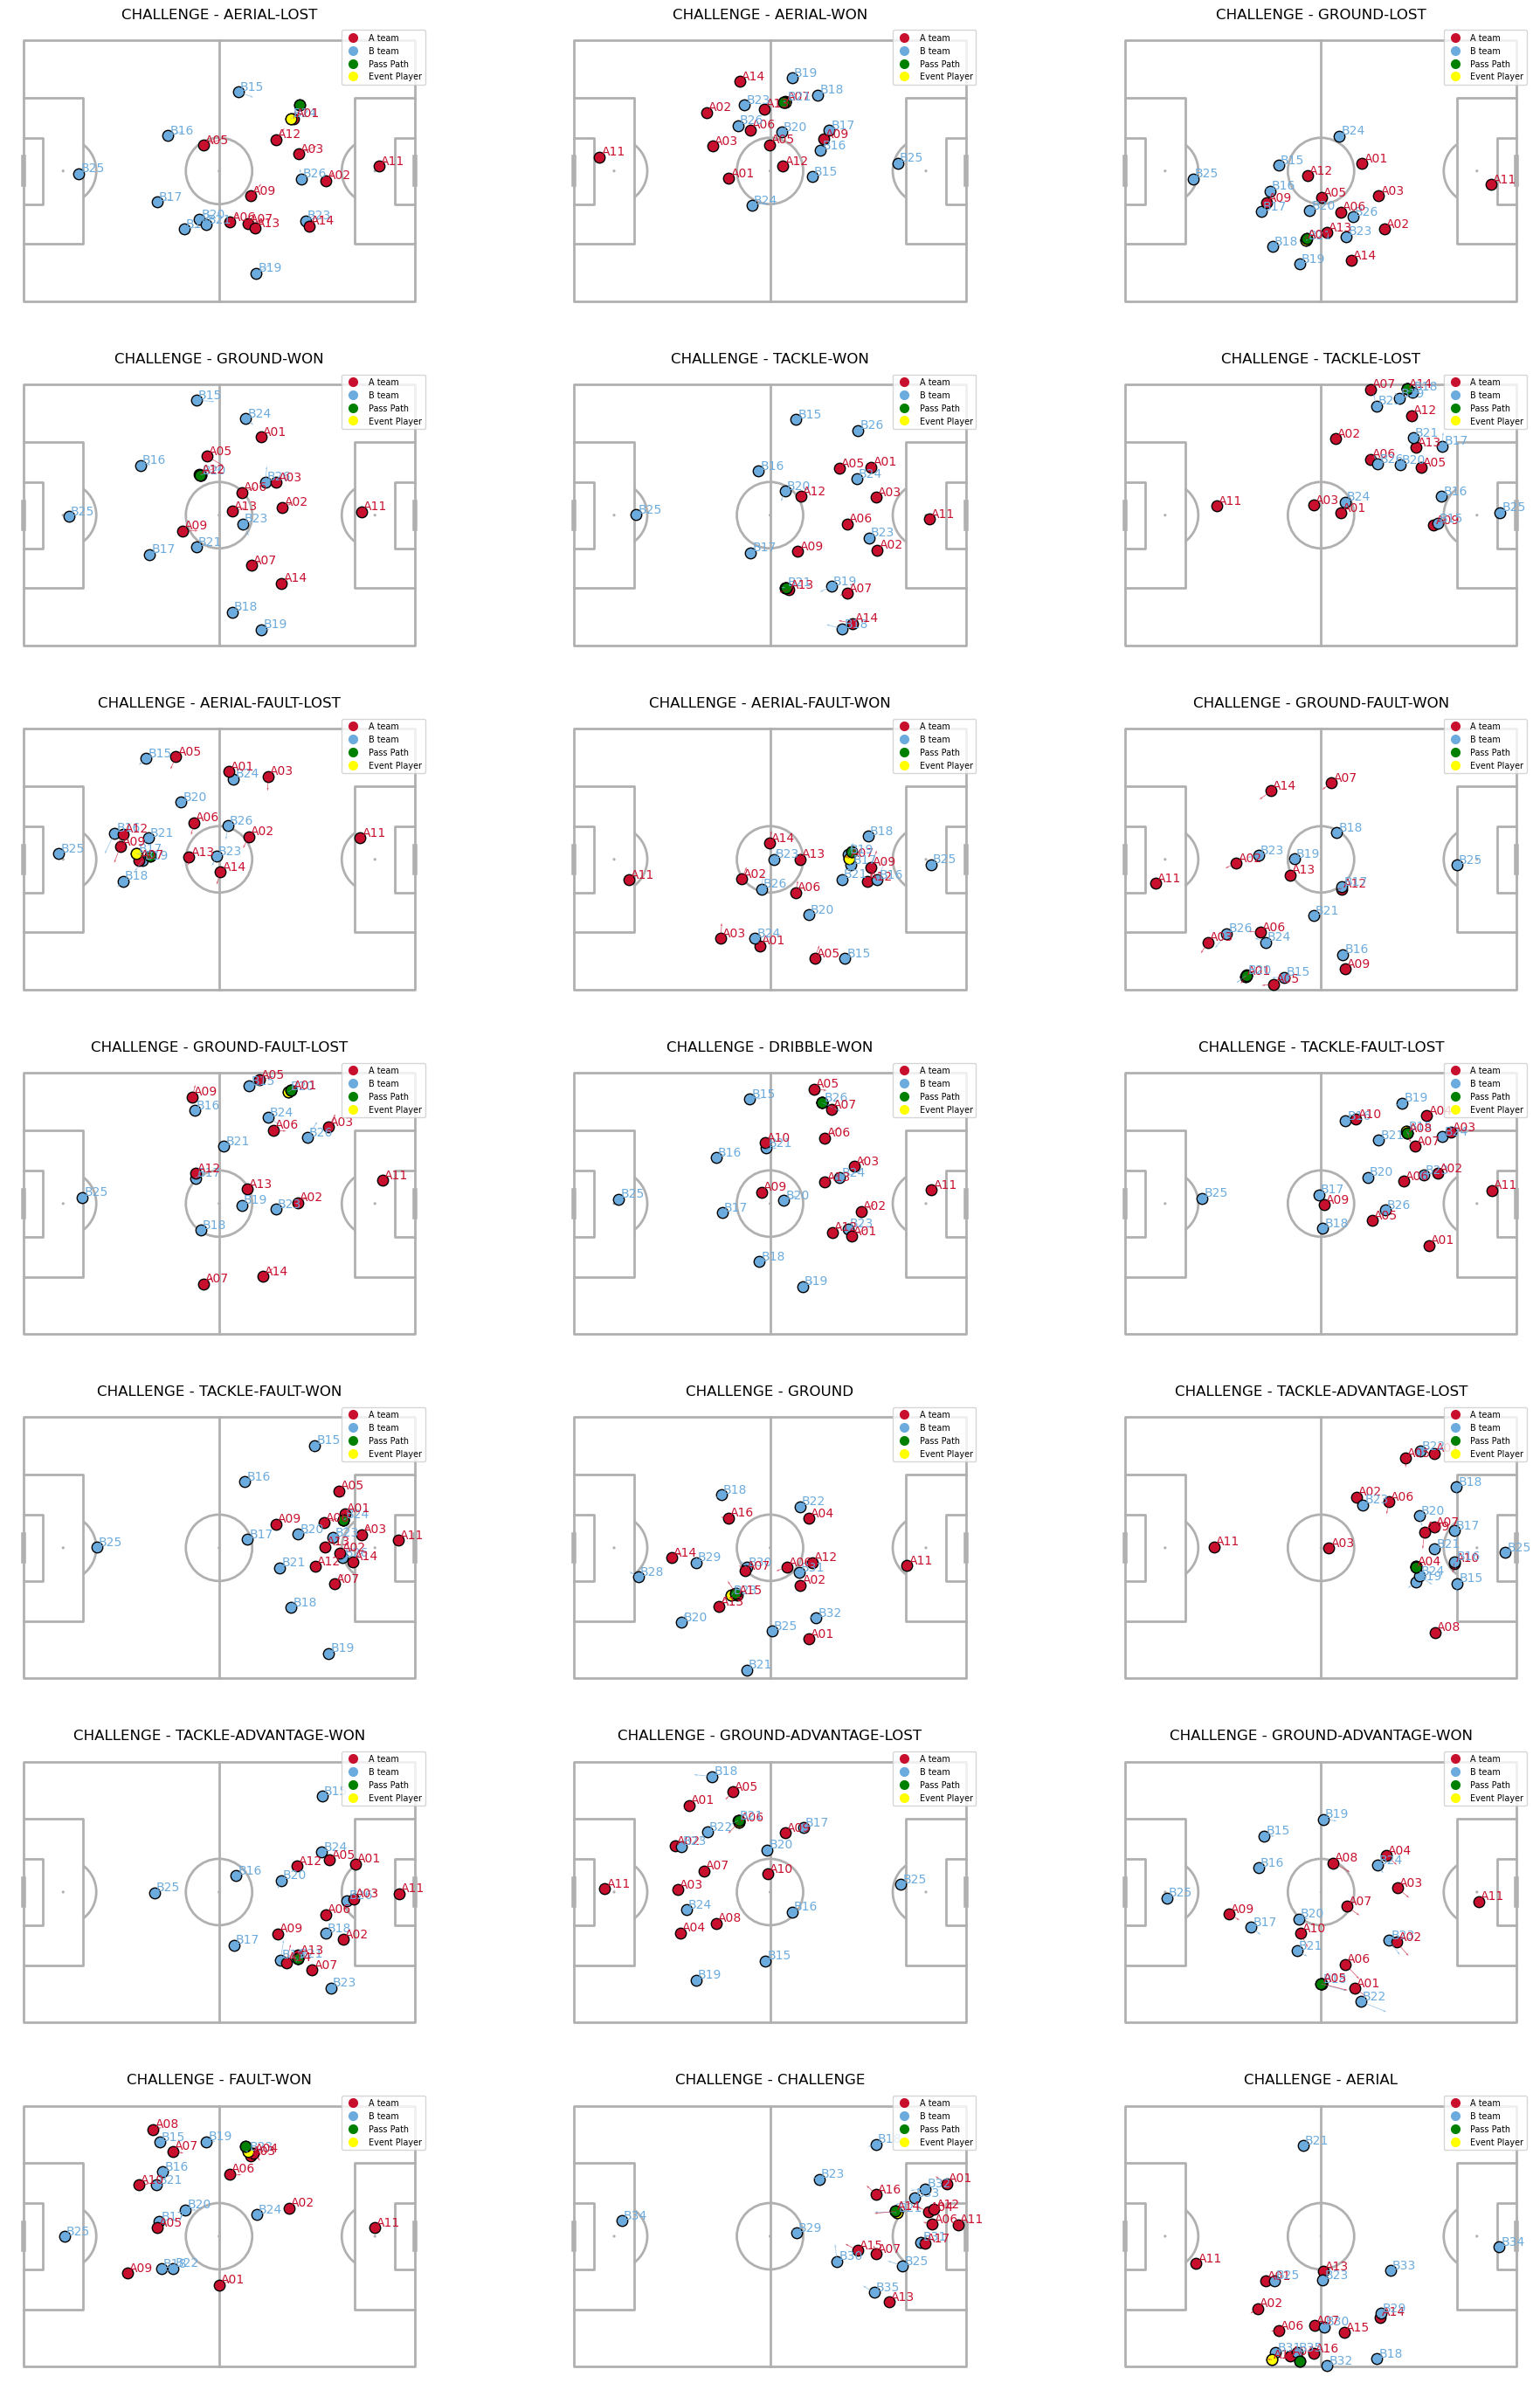

In [8]:
plot_by_type(all_events, given_type='CHALLENGE')

#### 4. RECOVERY

선수가 상대의 볼 소유를 현저하게 방해하거나, 세트 피스가 아닌 정지된 볼 상황에서 공을 경기에 복귀시킵니다.

1. INTERCEPTION : 볼을 소유한 상대방으로부터 공을 뺏음(interception)
2. RECOVERY : 걷어낸 볼을 회복함         
3. THEFT : 선수가 소유 중인 상대방 선수로부터 직접 볼을 훔칩니다. 이후의 이벤트는 관련이 없습니다 (즉, 볼이 경기장을 벗어나도 됩니다).           
4. SAVED : 골키퍼 또는 골을 방어하는 마지막 선수가 목표에 맞는 슛을 막아냅니다.            
5. BLOCKED : 선수가 골을 방어하는 마지막 선수가 아니며, 슛을 현저하게 방해합니다; 소유권을 계속 유지할 수 있습니다.
6. GOAL : 모르겠음. 일단 득점/실점/자책골은 아니긴함          

subtypes :  ['INTERCEPTION' 'RECOVERY' 'THEFT' 'SAVED' 'BLOCKED' 'GOAL']
INTERCEPTION 434 개 :  7275 .mp4
RECOVERY 278 개 :  7257 .mp4
THEFT 80 개 :  7247 .mp4
SAVED 19 개 :  6032 .mp4
BLOCKED 8 개 :  6392 .mp4
GOAL 1 개 :  4845 .mp4


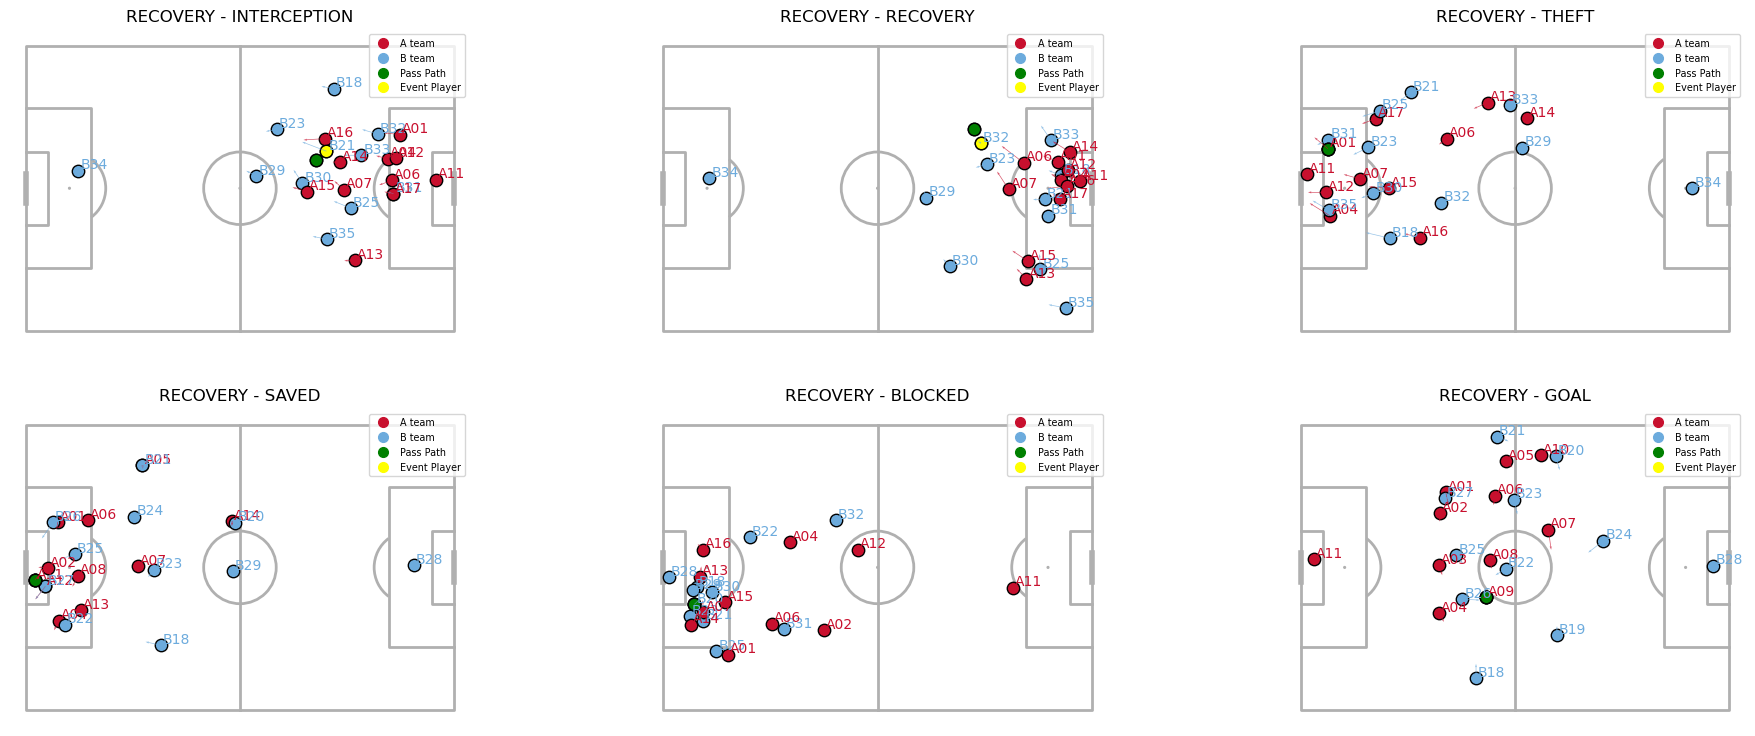

In [9]:
plot_by_type(all_events, given_type='RECOVERY')

#### 5. BALL LOST

- 선수가 상대방에게 볼 소유권을 잃거나 심판의 간섭으로 인해 볼을 잃습니다

1. INTERCEPTION : 패스를 발로 차단함.
2. HEAD-INTERCEPTION : 패스를 헤딩으로 차단함.
3. BALL LOST : 볼을 소유한 선수가 소유권을 읽어서 볼을 뺏김(패스 차단은 아님)
4. THEFT : 선수가 소유 중인 상대방 선수로부터 직접 볼을 훔칩니다. 이후의 이벤트는 관련이 없습니다 (즉, 볼이 경기장을 벗어나도 됩니다).
5. HEAD
6. CROSS-INTERCEPTION
7. GOAL KICK-INTERCEPTION
8. HEAD-FORCED
9. OFFSIDE
10. FORCED : 심판이 경기를 중단시킵니다. 이는 심판이 파울이 발생한 후 경기를 계속 진행하게 하지만 나중에 프리킥을 부여하기로 결정한 경우, 또는 소유 중인 선수가 아닌 다른 선수가 파울을 범했을 때 프리킥을 부여하는 경우를 포함합니다.
11. CLEARANCE : 상대방의 패스를 클리어하여 위험한 상황을 방지하거나, 상대방 선수의 소유를 방해하여 볼이 경기장을 벗어나게 합니다.
12. END HALF
13. GOAL KICK : 골킥으로 같은팀원에게 패스가 실패함
14. HEAD-CLEARANCE
15. DEEP BALL : 선수는 수비 라인 뒤의 다른 선수에게 기회를 만들기 위해 패스를 시도합니다; 볼 자체는 직접적으로 관련된 수비수를 최소한 통과해야 합니다.
16. WOODWORK : 슛이 골대의 포스트나 크로스바에 맞습니다.
17. REFEREE HIT : 심판이 맞음
18. FORCED-END HALF
19. HAND BALL
20. CLEARANCE-INTERCEPTION
21. THROUGH BALL-DEEP BALL-INTERCEPTION
22. CROSS
23. GOAL KICK-END HALF      

In [10]:
lost_events = all_events[(all_events['type'] == 'BALL LOST')]
lost_events.groupby('subtype').head(1)

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,...,goal,ownGoal,teamId,eventName,freeze_frame,accurate,value_label,Intended_Receiver,game_id,event_id
7,Away,BALL LOST,INTERCEPTION,1,346,13.84,380,15.20,B17,NaN,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",0.0,0,"{'dist': {'ID': 'B18', 'end_x': 34.398, 'end_y...",1,7
11,Away,BALL LOST,HEAD-INTERCEPTION,1,453,18.12,497,19.88,B16,NaN,...,0,0,2,BALL LOST,"{'B25': {'teammate': True, 'actor': False, 'ba...",NaN,0,{},1,11
44,Home,BALL LOST,BALL LOST,1,4445,177.80,4453,178.12,A10,NaN,...,0,0,1,BALL LOST,"{'A11': {'teammate': True, 'actor': False, 'ba...",NaN,0,{},1,44
76,Away,BALL LOST,THEFT,1,5628,225.12,5628,225.12,B18,NaN,...,0,0,2,BALL LOST,"{'B25': {'teammate': True, 'actor': False, 'ba...",NaN,0,{},1,76
82,Away,BALL LOST,HEAD,1,6779,271.16,6844,273.76,B18,NaN,...,0,0,2,BALL LOST,"{'B25': {'teammate': True, 'actor': False, 'ba...",NaN,0,{},1,82
89,Away,BALL LOST,CROSS-INTERCEPTION,1,6987,279.48,7043,281.72,B22,NaN,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",0.0,0,"{'dist': {'ID': 'B24', 'end_x': 29.20644, 'end...",1,89
112,Home,BALL LOST,GOAL KICK-INTERCEPTION,1,8482,339.28,8576,343.04,A11,NaN,...,0,0,1,Pass,"{'A11': {'teammate': True, 'actor': True, 'bal...",0.0,0,"{'dist': {'ID': 'A10', 'end_x': 61.49628, 'end...",1,112
152,Away,BALL LOST,HEAD-FORCED,1,10761,430.44,10801,432.04,B15,NaN,...,0,0,2,BALL LOST,"{'B25': {'teammate': True, 'actor': False, 'ba...",NaN,0,{},1,152
403,Away,BALL LOST,OFFSIDE,1,29517,1180.68,29517,1180.68,B18,NaN,...,0,0,2,BALL LOST,"{'B25': {'teammate': True, 'actor': False, 'ba...",NaN,0,{},1,403
541,Away,BALL LOST,FORCED,1,43485,1739.40,43485,1739.40,B21,NaN,...,0,0,2,BALL LOST,"{'B25': {'teammate': True, 'actor': False, 'ba...",NaN,0,{},1,541


subtypes :  ['INTERCEPTION' 'HEAD-INTERCEPTION' 'BALL LOST' 'THEFT' 'HEAD'
 'CROSS-INTERCEPTION' 'GOAL KICK-INTERCEPTION' 'HEAD-FORCED' 'OFFSIDE'
 'FORCED' 'CLEARANCE' 'END HALF' 'GOAL KICK' 'HEAD-CLEARANCE' 'DEEP BALL'
 'WOODWORK' 'REFEREE HIT' 'FORCED-END HALF' 'HAND BALL'
 'CLEARANCE-INTERCEPTION' 'CROSS']
INTERCEPTION 347 개 :  7274 .mp4
HEAD-INTERCEPTION 20 개 :  3627 .mp4
BALL LOST 201 개 :  7267 .mp4
THEFT 85 개 :  7251 .mp4
HEAD 33 개 :  7042 .mp4
CROSS-INTERCEPTION 22 개 :  3320 .mp4
GOAL KICK-INTERCEPTION 9 개 :  3202 .mp4
HEAD-FORCED 1 개 :  152 .mp4
OFFSIDE 4 개 :  4180 .mp4
FORCED 16 개 :  6177 .mp4
CLEARANCE 16 개 :  7255 .mp4
END HALF 2 개 :  7299 .mp4
GOAL KICK 4 개 :  5510 .mp4
HEAD-CLEARANCE 1 개 :  1109 .mp4
DEEP BALL 2 개 :  4917 .mp4
WOODWORK 1 개 :  1211 .mp4
REFEREE HIT 2 개 :  4410 .mp4
FORCED-END HALF 1 개 :  2773 .mp4
HAND BALL 5 개 :  5603 .mp4
CLEARANCE-INTERCEPTION 1 개 :  3635 .mp4
CROSS 5 개 :  6780 .mp4


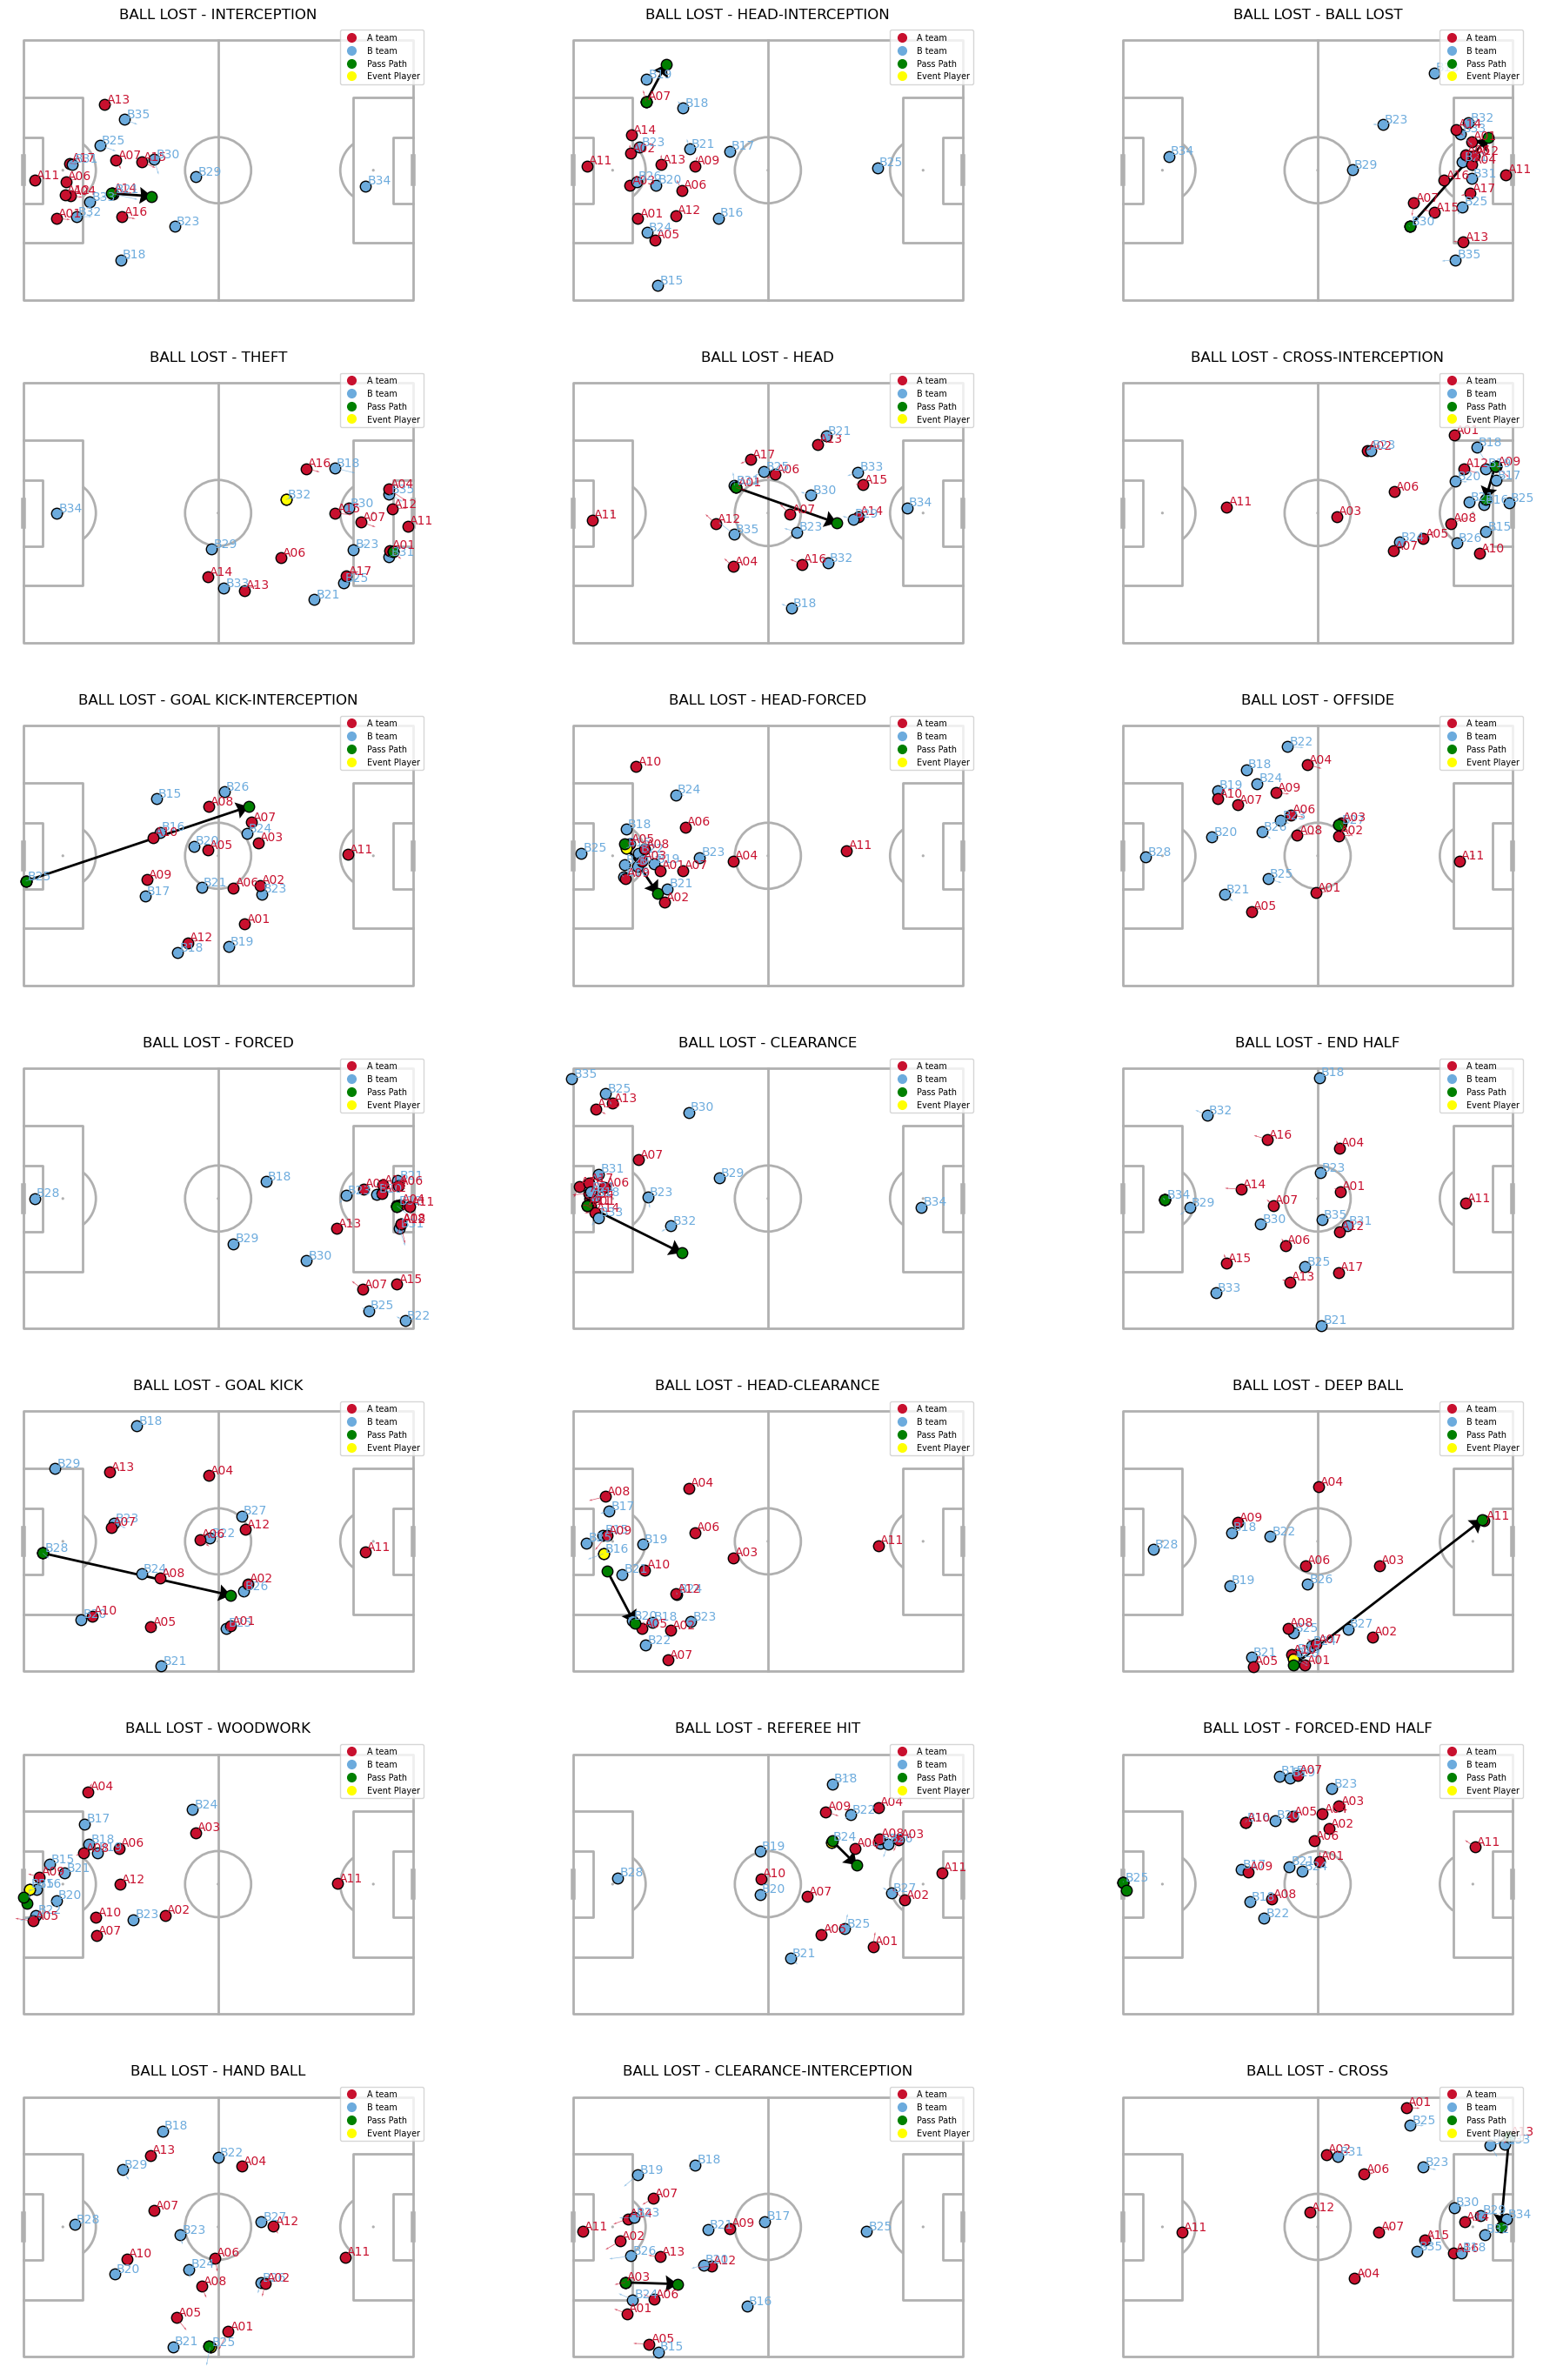

In [11]:
plot_by_type(all_events, given_type='BALL LOST')

### 6. SET PIECE

subtypes :  ['KICK OFF' 'CORNER KICK' 'THROW IN' 'FREE KICK' 'KICK OFF-RETAKEN'
 'FREE KICK-RETAKEN' 'PENALTY' 'SET PIECE']
KICK OFF 17 개 :  5758 .mp4
CORNER KICK 26 개 :  7252 .mp4
THROW IN 109 개 :  7192 .mp4
FREE KICK 62 개 :  3671 .mp4
KICK OFF-RETAKEN 1 개 :  2774 .mp4
FREE KICK-RETAKEN 2 개 :  3437 .mp4
PENALTY 1 개 :  3415 .mp4
SET PIECE 29 개 :  7159 .mp4


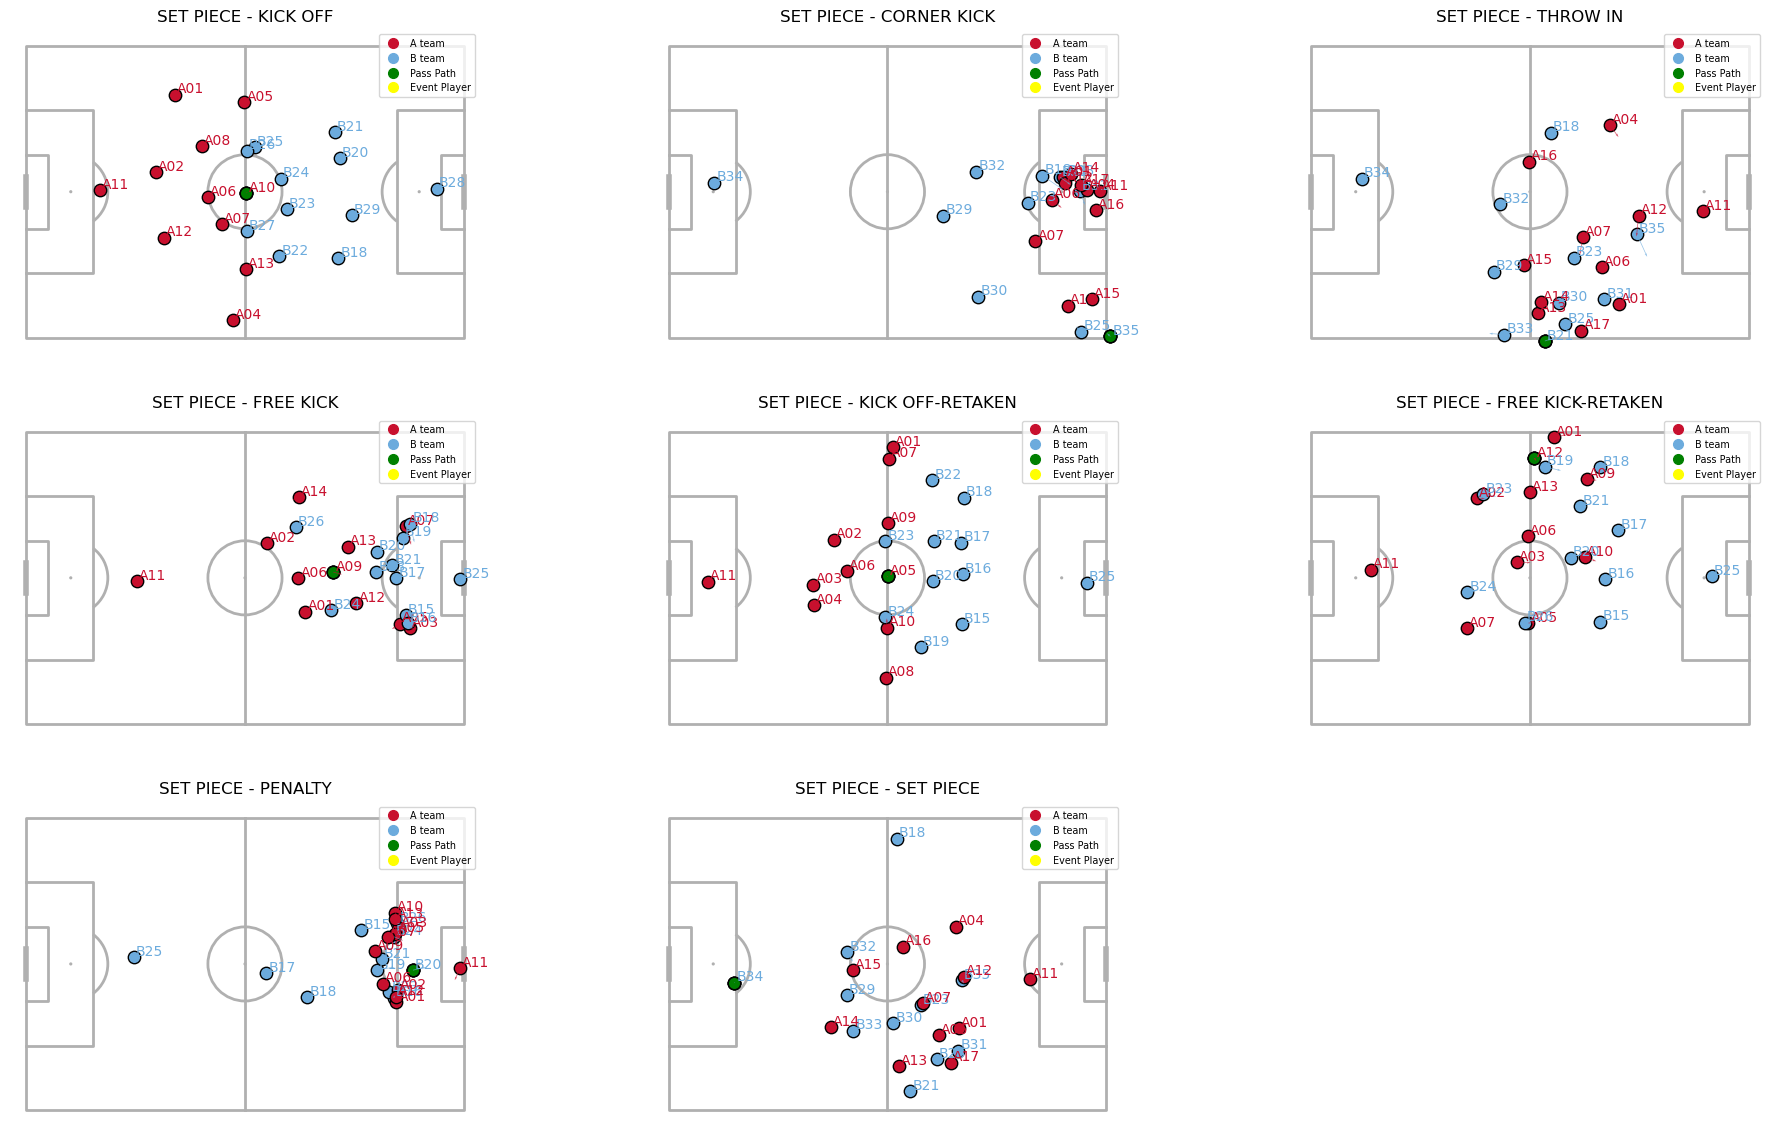

In [12]:
plot_by_type(all_events, given_type='SET PIECE')

### 7. BALL OUT
 
- 선수가 마지막으로 볼을 만진 뒤 볼이 경기장을 벗어납니다.

1. BALL OUT : 볼을 놓친 경우
2. HEAD-CLEARANCE : 헤딩으로 걷어낸 경우
3. CLEARANCE : 위험지역에서 걷어내는 경우(패스의도도 같이 섞여있는지는 확인해봐야함)
4. HEAD 
5. CROSS
6. WOODWORK-GOAL
7. GOAL KICK 
8. DEEP BALL 
9. THROUGH BALL-DEEP BALL 

subtypes :  ['BALL OUT' 'HEAD-CLEARANCE' 'CLEARANCE' 'HEAD' 'CROSS' 'WOODWORK-GOAL'
 'GOAL KICK' 'DEEP BALL']
BALL OUT 127 개 :  7190 .mp4
HEAD-CLEARANCE 2 개 :  3016 .mp4
CLEARANCE 18 개 :  7248 .mp4
HEAD 10 개 :  7013 .mp4
CROSS 4 개 :  5321 .mp4
WOODWORK-GOAL 1 개 :  1093 .mp4
GOAL KICK 1 개 :  1725 .mp4
DEEP BALL 1 개 :  4944 .mp4


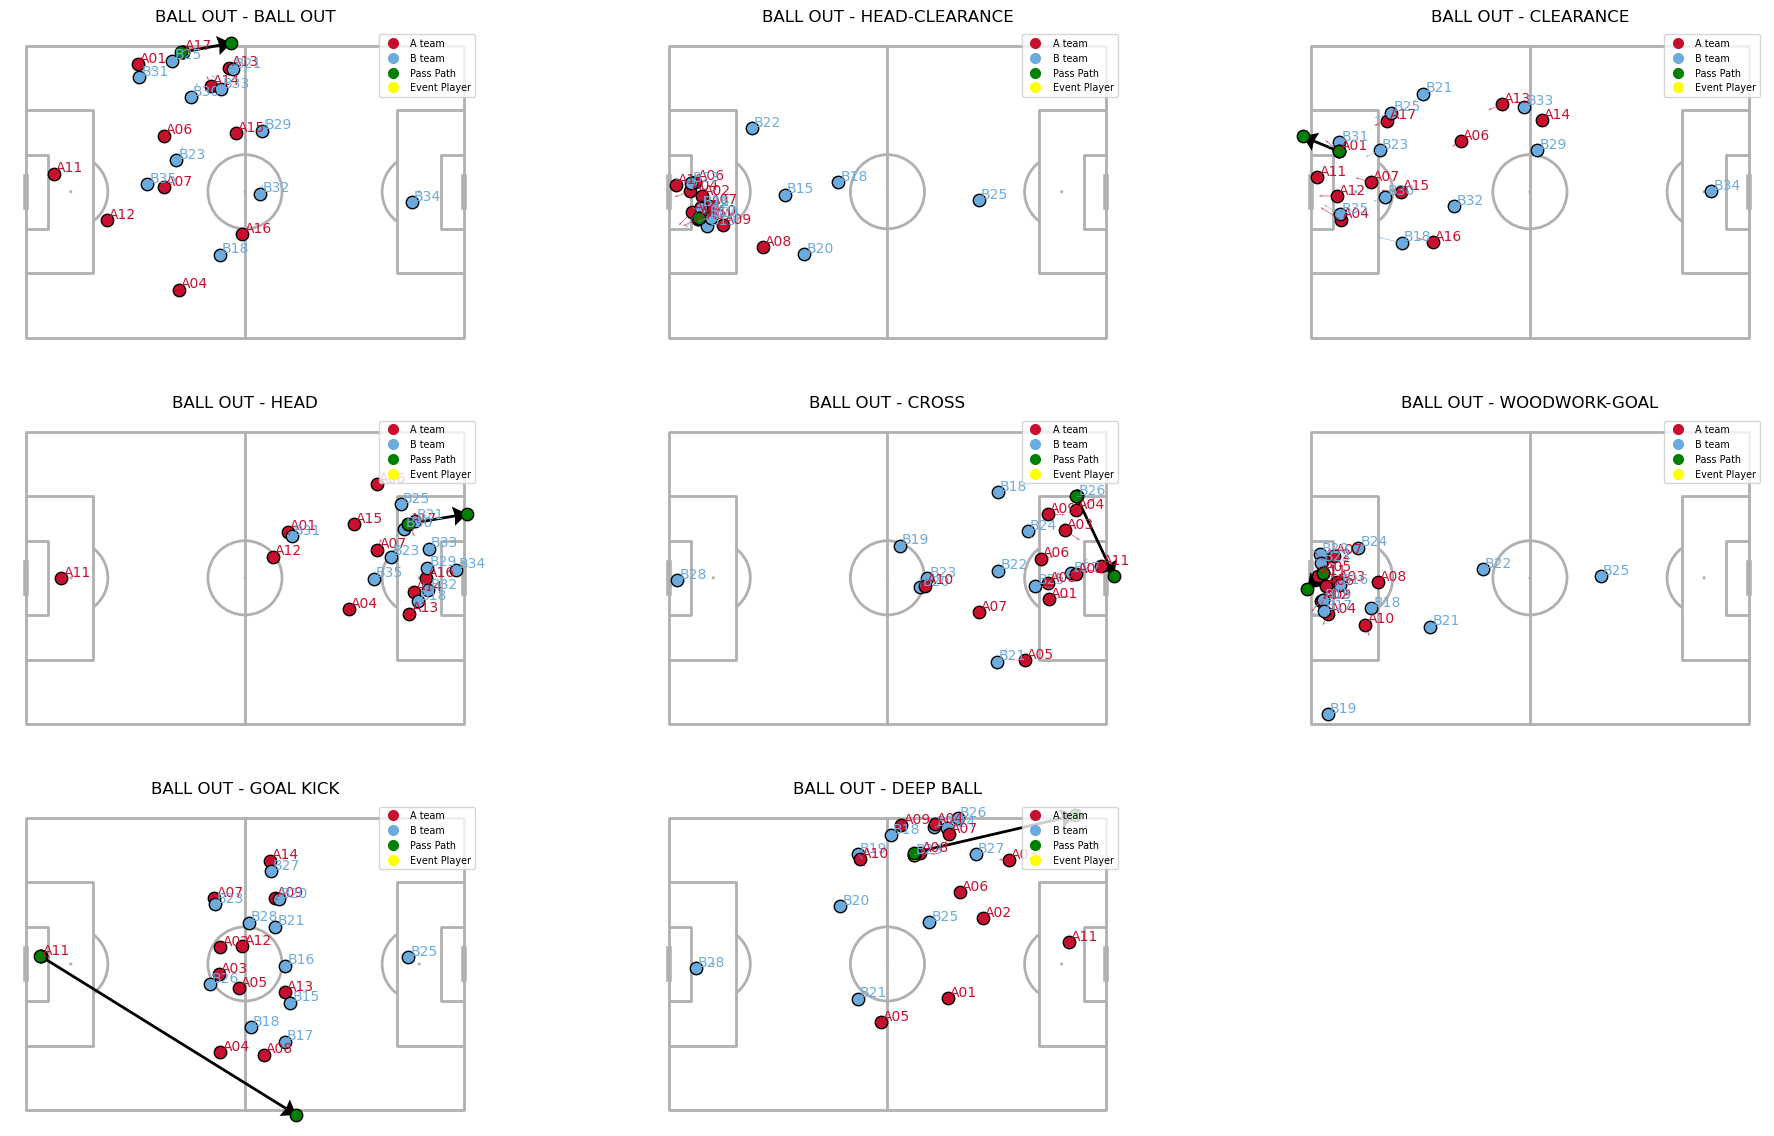

In [13]:
plot_by_type(all_events, given_type='BALL OUT')

### 8. SHOT

subtypes :  ['HEAD-ON TARGET-GOAL' 'OFF TARGET-OUT' 'ON TARGET-SAVED'
 'HEAD-OFF TARGET-OUT' 'HEAD-ON TARGET-SAVED' 'BLOCKED'
 'HEAD-WOODWORK-OUT' 'ON TARGET-GOAL' 'OFF TARGET' 'OFF TARGET-HEAD-OUT'
 'SHOT']
HEAD-ON TARGET-GOAL 2 개 :  2863 .mp4
OFF TARGET-OUT 14 개 :  3588 .mp4
ON TARGET-SAVED 11 개 :  3672 .mp4
HEAD-OFF TARGET-OUT 7 개 :  3648 .mp4
HEAD-ON TARGET-SAVED 2 개 :  845 .mp4
BLOCKED 6 개 :  6391 .mp4
HEAD-WOODWORK-OUT 1 개 :  961 .mp4
ON TARGET-GOAL 6 개 :  3468 .mp4
OFF TARGET 1 개 :  1664 .mp4
OFF TARGET-HEAD-OUT 1 개 :  2707 .mp4
SHOT 17 개 :  7157 .mp4


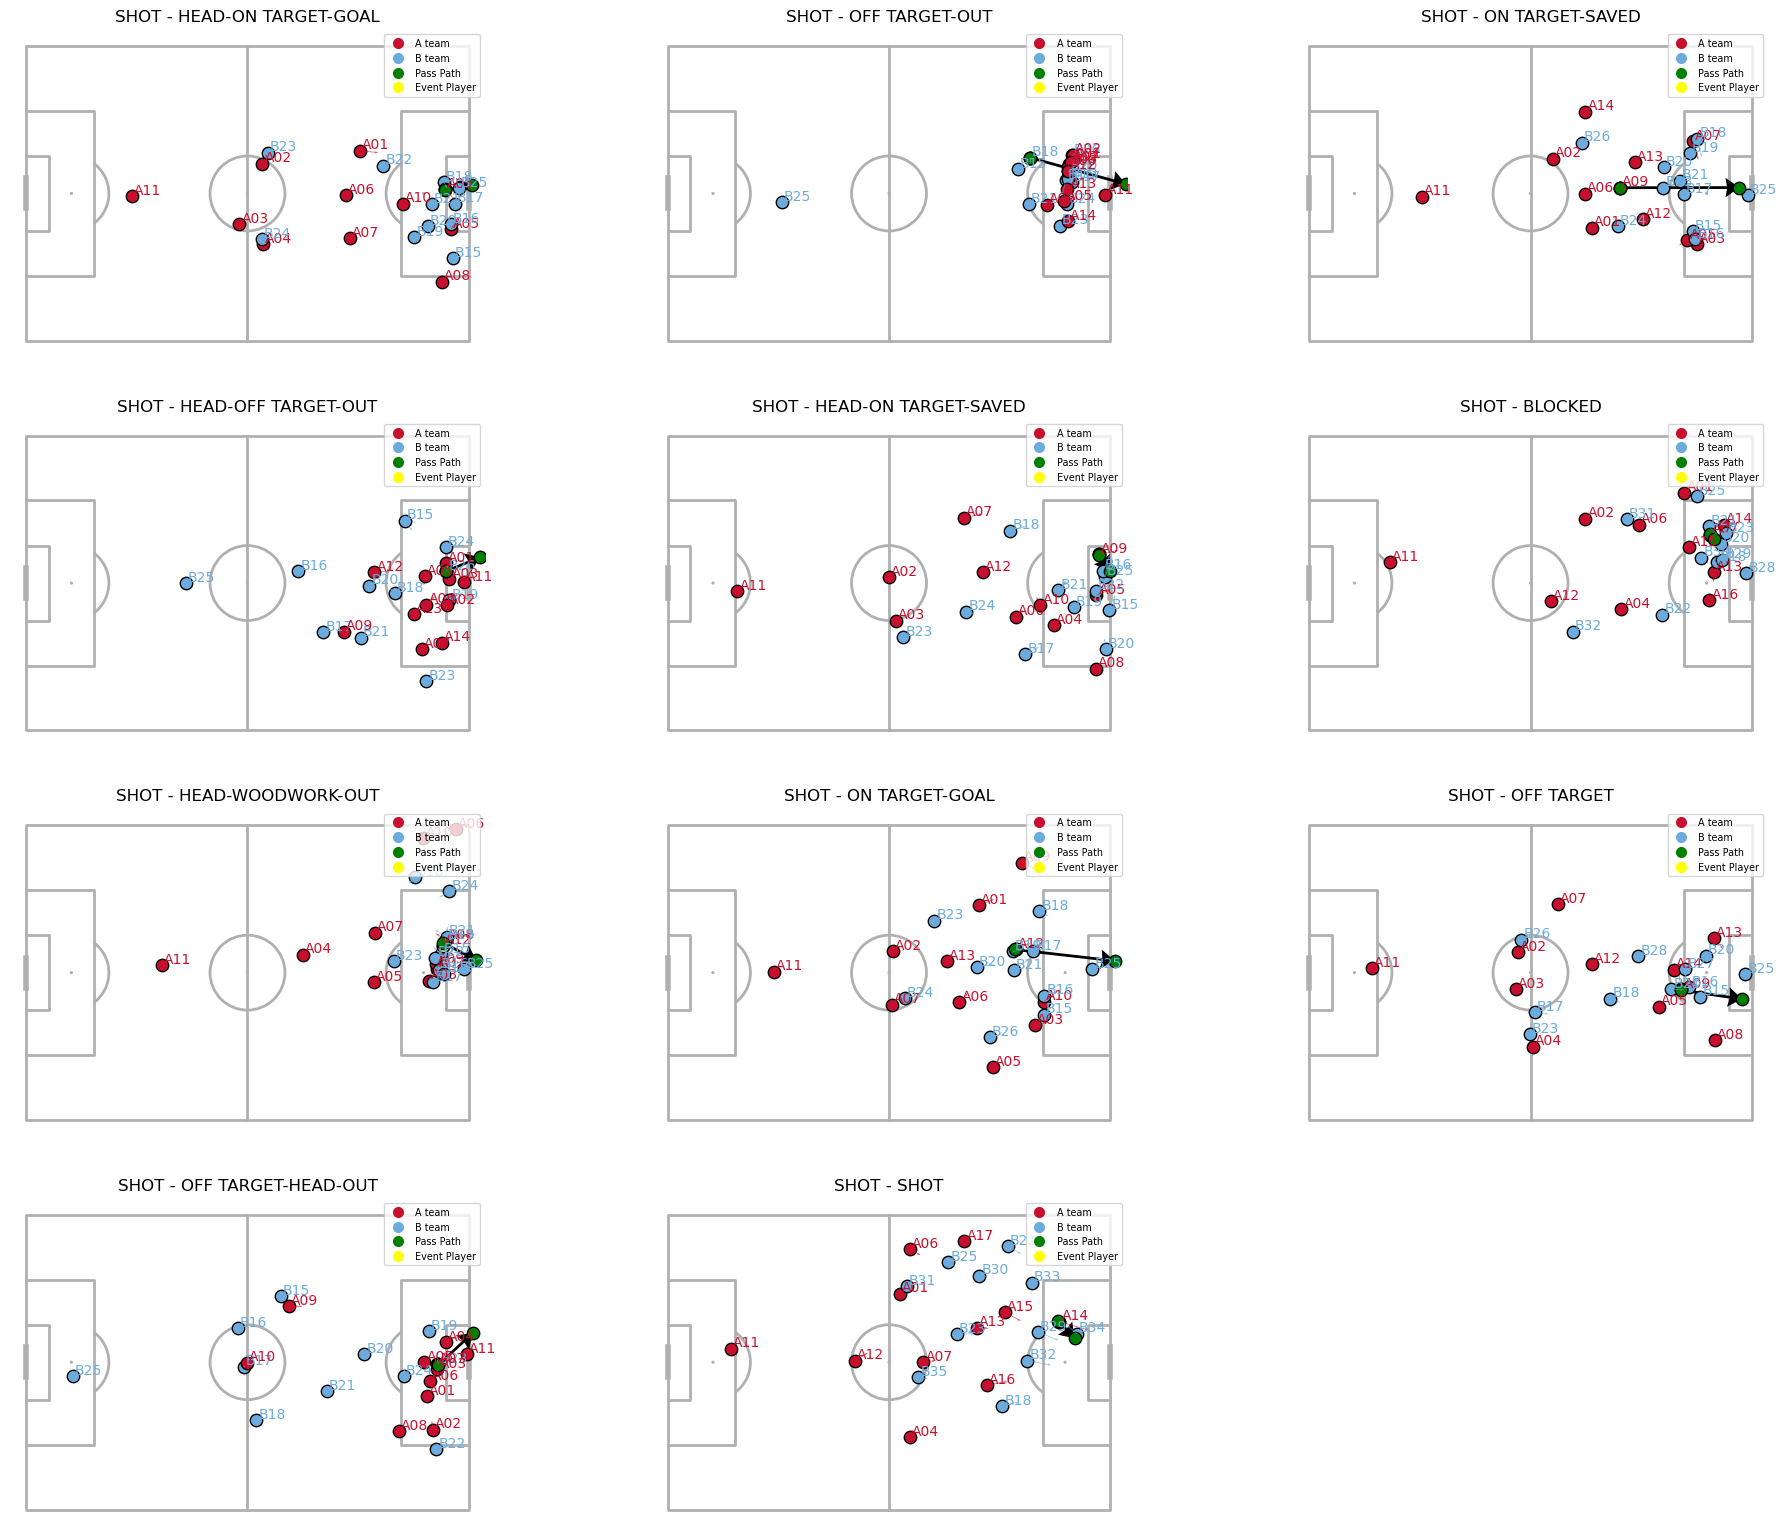

In [14]:
plot_by_type(all_events, given_type='SHOT')

### 9. FAULT RECEIVED

- 소유 중인 선수에게 파울이 발생하고 심판이 즉시 프리킥을 부여합니다.

subtypes :  ['FAULT RECEIVED']
FAULT RECEIVED 54 개 :  7084 .mp4


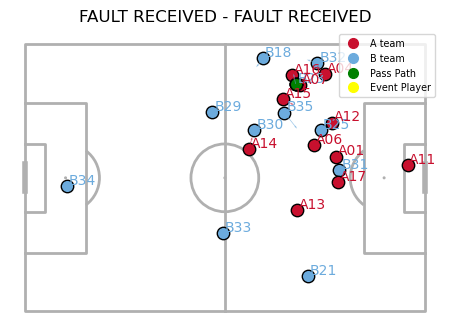

In [15]:
plot_by_type(all_events, given_type='FAULT RECEIVED')

### 10. CARD


subtypes :  ['YELLOW']
YELLOW 11 개 :  6339 .mp4


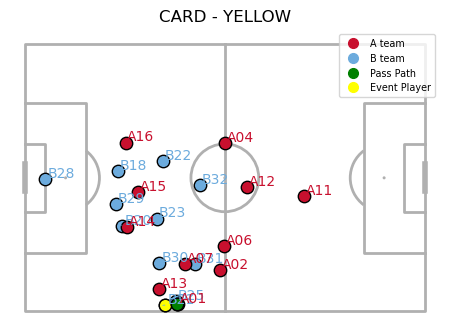

In [16]:
plot_by_type(all_events, given_type='CARD')